### Data preprocessing

In [1]:
#Importing the relevant libraries
import pandas as pd

In [2]:
# Creating a function to extract the data from the txt file.
def extract_data(file_path):
    with open(file_path, 'r') as file:
        lines = file.readlines()
    
    data_started = False
    extracted_data = []

    for line in lines:
        if 'Start data' in line:
            data_started = True
            continue 
        elif 'End data' in line:
            data_started = False
            break 
        
        if data_started:
            stripped_line = line.strip()
            if stripped_line:  # Ignores empty lines
                extracted_data.append(stripped_line)
    
    return extracted_data

In [3]:
# Creating a function fo convert the lines to a dataframe.
def create_dataframe(data):
    # Splitting each line by spaces
    parsed_data = [line.split() for line in data]
    # Determining the maximum number of columns
    max_columns = max(len(line) for line in parsed_data)
    # Padding shorter rows.
    for line in parsed_data:
        while len(line) < max_columns:
            line.append('')
    # Creating column names
    columns = [f'Column {i+1}' for i in range(max_columns)]   
    # Convert to DataFrame
    df = pd.DataFrame(parsed_data, columns=columns)
    
    return df


In [15]:
# Extracting the dataframe
extracted_data = extract_data('datafile.txt')
# Creating the dataframe from the extracted data
df = create_dataframe(extracted_data)
df.head()

,Column 1,Column 2,Column 3,Column 4,Column 5,Column 6
0,Sensor,1,Time,1,Value,0.527858
1,Sensor,2,Time,1,Value,-0.662543
2,Sensor,3,Time,1,Value,-0.669858
3,Sensor,1,Time,2,Value,-0.508336
4,Sensor,2,Time,2,Value,-0.154916


In [16]:
# Creating the relevant columns
df['Sensors'] = df['Column 1'] + df['Column 2']
df['Time'] =  df['Column 4']
df['Values'] = df['Column 6']
# Dropping the irrelevant columns
df = df.iloc[:,6:]
# Converting the time and values to integer type
df['Time'] = df['Time'].astype(int)
df['Values'] = df['Values'].astype(float)
# Taking a look at the dataframe
df.head()

,Sensors,Time,Values
0,Sensor1,1,0.527858
1,Sensor2,1,-0.662543
2,Sensor3,1,-0.669858
3,Sensor1,2,-0.508336
4,Sensor2,2,-0.154916
...,...,...,...
295,Sensor2,99,-0.039309
296,Sensor3,99,-0.153209
297,Sensor1,100,-0.138225
298,Sensor2,100,-0.0115746


### Plotting to visualize the sensor values

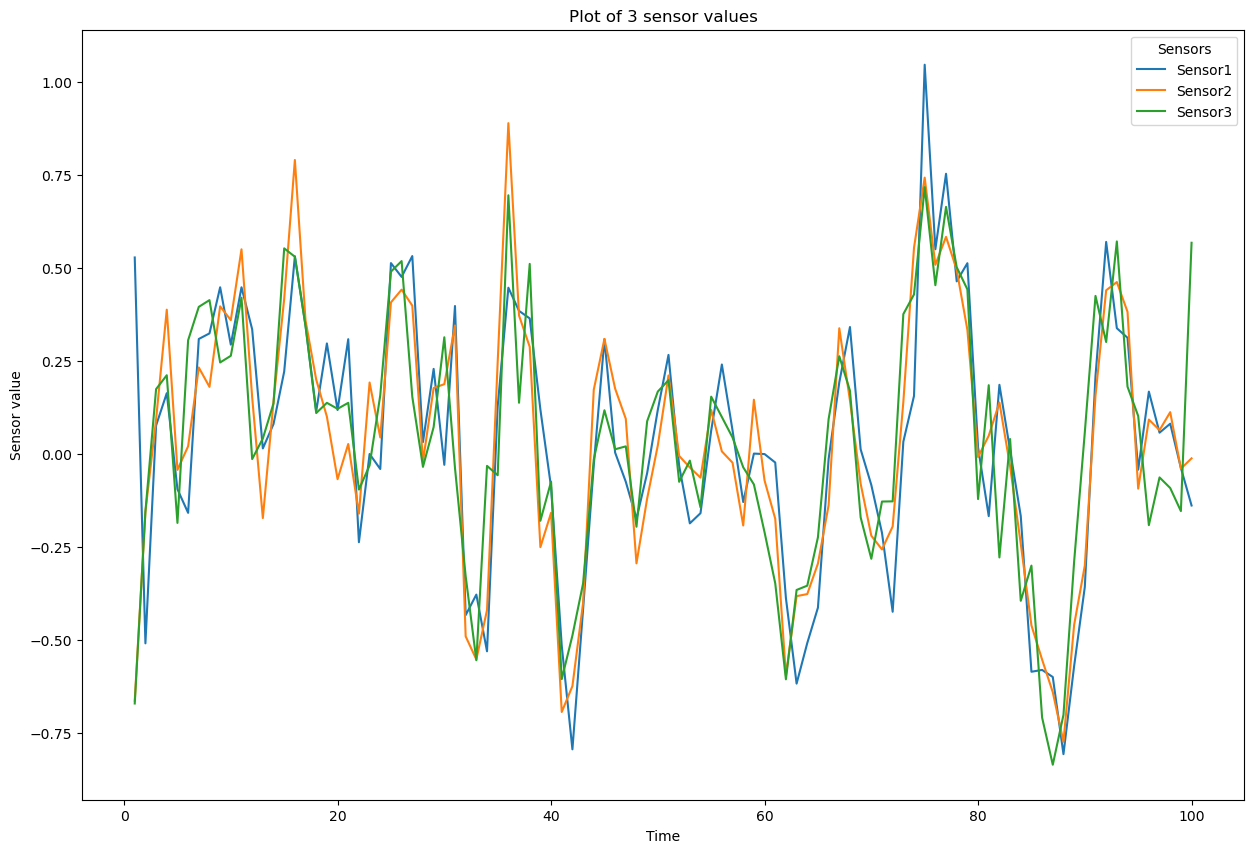

In [22]:
# Creating a pivot dataframe. 
pivot_df = df.pivot(index='Time',columns='Sensors',values='Values')
# Plotting the pivot dataframe
pivot_df.plot(title='Plot of 3 sensor values',xlabel='Time',ylabel='Sensor value',figsize=(15,10));